In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

In [80]:
full_df = pd.read_csv('Data/Final_NBA_PLayers.csv', index_col = 0)
df = pd.read_csv('Data/Final_NBA_Seasons1-3.csv', index_col = 0)
df_modern = pd.read_csv('Data/Final_NBA_Seasons1-3_1977.csv', index_col = 0)
df_modern.set_index('Player', inplace = True)

In [81]:
df_modern.head()

,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,...,OWS_2-3,DWS_1-2,DWS_2-3,PER_1-2,PER_2-3,USG_1-2,USG_2-3,VORP_1-2,VORP_2-3,target
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,243,137.0,6418.0,847,1615,846,1602,1.0,13.0,615,...,0.2,1.3,0.1,3.9,-1.2,0.0,0.0,1.5,-0.2,0
A.J. Price\priceaj01,150,3.0,2228.0,318,848,191,437,127.0,411.0,142,...,0.6,-0.1,-0.2,-3.3,0.8,0.0,-5.0,-0.5,0.3,0
Aaron Brooks\brookaa01,213,117.0,5525.0,984,2339,626,1396,358.0,943.0,436,...,2.5,1.4,-0.6,-0.2,3.1,1.1,2.8,0.3,1.3,0
Aaron Gordon\gordoaa01,205,117.0,4958.0,760,1652,628,1195,132.0,457.0,329,...,-1.2,1.5,-0.5,5.6,-2.5,1.8,2.8,1.6,-0.8,0
Aaron Gray\grayaa01,149,19.0,1639.0,226,453,226,451,0.0,2.0,110,...,0.0,0.0,-0.4,-2.4,5.1,-7.5,1.9,0.0,0.3,0


<AxesSubplot:xlabel='PTS', ylabel='WS_3'>

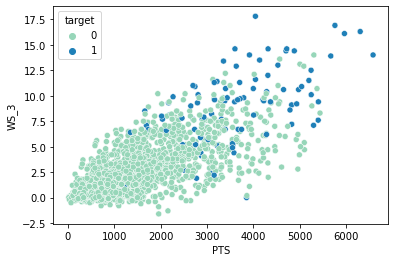

In [56]:
sns.scatterplot(x = df_modern.PTS, y = df_modern.WS_3, hue = df_modern['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='PER_3'>

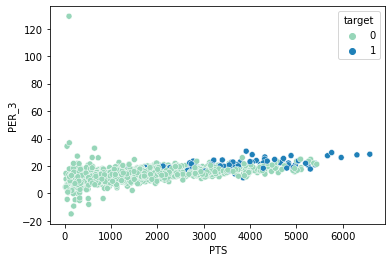

In [57]:
sns.scatterplot(x = df_modern.PTS, y = df_modern.PER_3, hue = df_modern['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='VORP_3'>

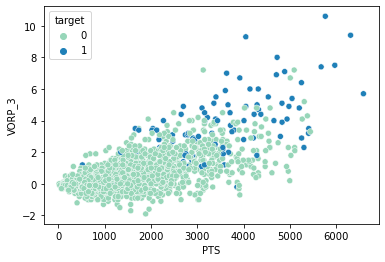

In [58]:
sns.scatterplot(x = df_modern.PTS, y = df_modern.VORP_3, hue = df_modern['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='G'>

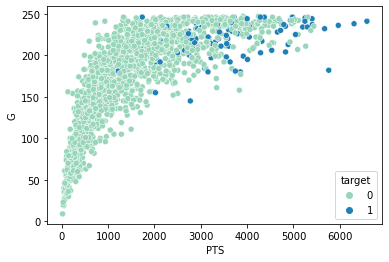

In [59]:
sns.scatterplot(x = df_modern.PTS, y = df_modern.G, hue = df_modern['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='GS'>

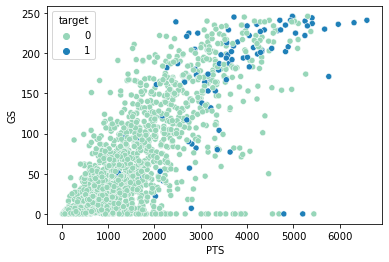

In [60]:
sns.scatterplot(x = df_modern.PTS, y = df_modern.GS, hue = df_modern['target'], palette = 'YlGnBu')

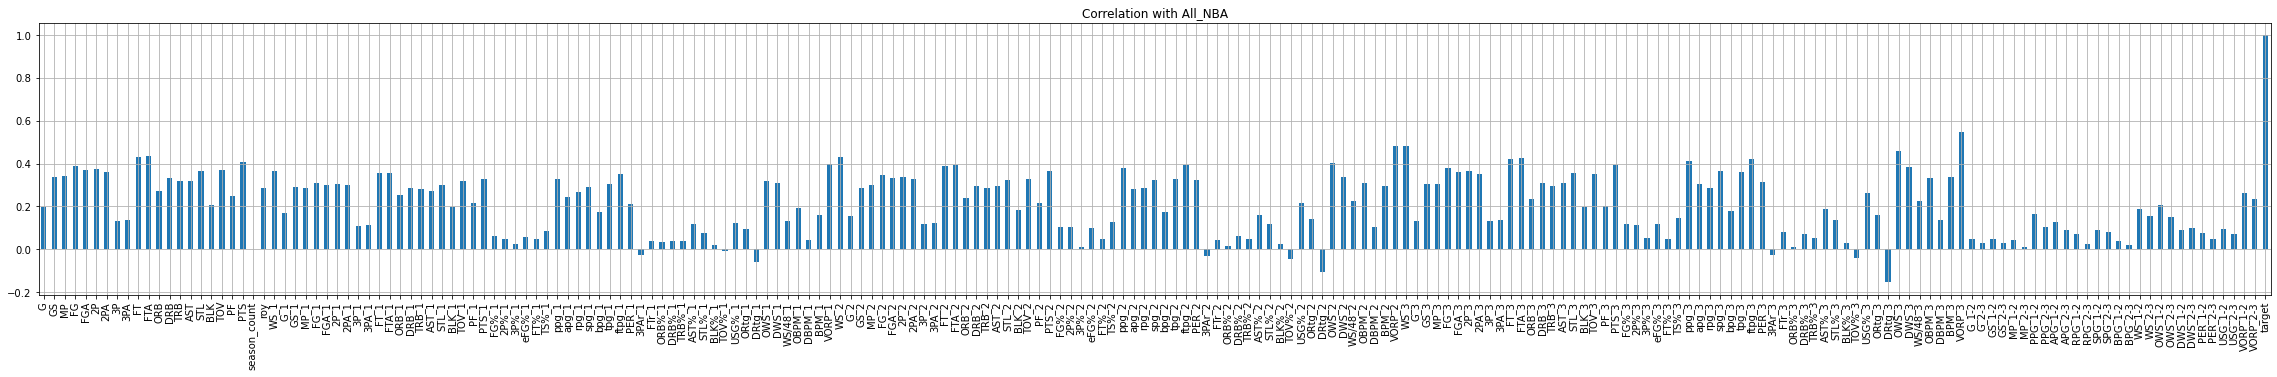

In [61]:
df_modern.corrwith(df_modern.target).plot.bar(figsize = (40, 5), title = "Correlation with All_NBA", 
                                        fontsize = 10,rot = 90, grid = True);

In [62]:
correlated_features = set()
correlation_matrix = df_modern.drop('target', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [63]:
corr_feat = list(correlated_features)

In [64]:
df_modern.head()

,Player,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,OWS_2-3,DWS_1-2,DWS_2-3,PER_1-2,PER_2-3,USG_1-2,USG_2-3,VORP_1-2,VORP_2-3,target
0,A.C. Green\greenac01,243,137.0,6418.0,847,1615,846,1602,1.0,13.0,...,0.2,1.3,0.1,3.9,-1.2,0.0,0.0,1.5,-0.2,0
1,A.J. Price\priceaj01,150,3.0,2228.0,318,848,191,437,127.0,411.0,...,0.6,-0.1,-0.2,-3.3,0.8,0.0,-5.0,-0.5,0.3,0
2,Aaron Brooks\brookaa01,213,117.0,5525.0,984,2339,626,1396,358.0,943.0,...,2.5,1.4,-0.6,-0.2,3.1,1.1,2.8,0.3,1.3,0
3,Aaron Gordon\gordoaa01,205,117.0,4958.0,760,1652,628,1195,132.0,457.0,...,-1.2,1.5,-0.5,5.6,-2.5,1.8,2.8,1.6,-0.8,0
4,Aaron Gray\grayaa01,149,19.0,1639.0,226,453,226,451,0.0,2.0,...,0.0,0.0,-0.4,-2.4,5.1,-7.5,1.9,0.0,0.3,0


In [65]:
df_non_corr = df_modern.drop(columns = corr_feat)

In [66]:
df_non_corr.head()

,Player,G,GS,MP,3P,FT,ORB,DRB,AST,STL,...,WS_2-3,DWS_1-2,DWS_2-3,PER_1-2,PER_2-3,USG_1-2,USG_2-3,VORP_1-2,VORP_2-3,target
0,A.C. Green\greenac01,243,137.0,6418.0,1.0,615,615.0,1091.0,231,206.0,...,0.3,1.3,0.1,3.9,-1.2,0.0,0.0,1.5,-0.2,0
1,A.J. Price\priceaj01,150,3.0,2228.0,127.0,142,41.0,180.0,303,84.0,...,0.4,-0.1,-0.2,-3.3,0.8,0.0,-5.0,-0.5,0.3,0
2,Aaron Brooks\brookaa01,213,117.0,5525.0,358.0,436,100.0,328.0,759,128.0,...,1.9,1.4,-0.6,-0.2,3.1,1.1,2.8,0.3,1.3,0
3,Aaron Gordon\gordoaa01,205,117.0,4958.0,132.0,329,316.0,765.0,311,145.0,...,-1.7,1.5,-0.5,5.6,-2.5,1.8,2.8,1.6,-0.8,0
4,Aaron Gray\grayaa01,149,19.0,1639.0,0.0,110,199.0,295.0,109,44.0,...,-0.4,0.0,-0.4,-2.4,5.1,-7.5,1.9,0.0,0.3,0


In [67]:
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

In [72]:
X = df_non_corr.drop(['target','Player'], axis=1).fillna(0)
target = df_non_corr['target']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=3, scoring='recall')
rfecv.fit(X, target)

RFECV(cv=3, estimator=RandomForestClassifier(random_state=101),
      scoring='recall')

In [73]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


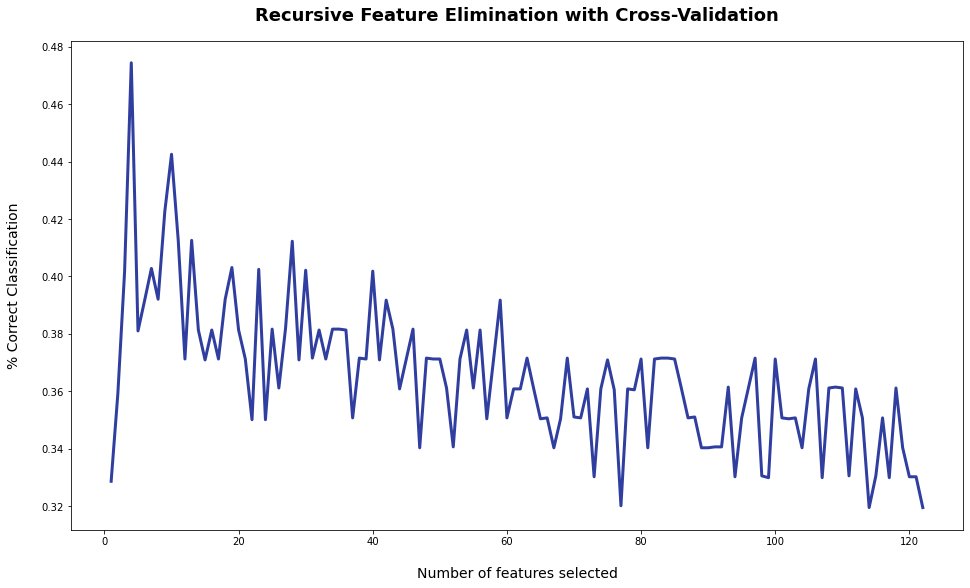

In [74]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [75]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

ValueError: Length of values (4) does not match length of index (122)